In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data=pd.read_csv("C://Users//prasa//Downloads//Brain Tumor.csv")

In [3]:
data.drop('Image',axis=1,inplace=True)
data.drop('Variance',axis=1,inplace=True)
data.drop('Contrast',axis=1,inplace=True)

In [4]:
data.head(5)
data.columns

Index(['Class', 'Mean', 'Standard Deviation', 'Entropy', 'Skewness',
       'Kurtosis', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity',
       'Correlation', 'Coarseness'],
      dtype='object')

In [5]:
import seaborn as sns

In [6]:
data.isnull().sum()

Class                 0
Mean                  0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

In [7]:
data.shape

(3762, 12)

In [8]:
#plt.figure(figsize=(10,10))
#sns.pairplot(data,hue='Class')
#plt.show()

In [9]:
#plt.figure(figsize=(15,15))
#sns.heatmap(data.corr(),annot=True)
#plt.show()

In [10]:
data.head(10)
data.drop('Correlation',axis=1,inplace=True)



In [11]:
data.drop('Coarseness',axis=1,inplace=True)

In [12]:
data.head(2)
Y=data[['Class']]
X=data

In [13]:
X.drop('Class',axis=1,inplace=True)


In [14]:
X.head(2)

,Mean,Standard Deviation,Entropy,Skewness,Kurtosis,Energy,ASM,Homogeneity,Dissimilarity
0,6.535339,24.891522,0.109059,4.276477,18.900575,0.293314,0.086033,0.530941,4.473346
1,8.749969,28.389393,0.266538,3.718116,14.464618,0.475051,0.225674,0.651352,3.220072


In [15]:
Y.shape

(3762, 1)

In [16]:
X=X.values

In [17]:
X.shape

(3762, 9)

In [18]:
Y=Y.values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
X_Train=X_train.T
X_Train.shape
Y_Train=y_train.T
Y_Train.shape
X_Test=X_test.T
Y_Test=y_test.T
Y_Train.shape


(1, 2257)

In [23]:
def model(X,Y,iterations,learning_rate):
    m=X_Train.shape[1]# No of data
    n=X_Train.shape[0]# No of features
    w=np.zeros((n,1))
    b=0
    cost_list=[]
    for i in range(iterations):
        
            z=np.dot(w.T,X)+b
            A=sigmoid(z) 
            cost = (-1/m)*(np.sum(Y*(np.log(A))+(1-Y)*(np.log(1-A))))
            dw=(1/m)*np.dot(A-Y,X.T)
            db=(1/m)*np.sum(A-Y)
            w=w-(learning_rate*dw.T)
            b=b-(learning_rate*db)
            cost_list.append(cost)
            if(i%500 == 0):
                print("cost after "+str(i)+" iterations is ",cost)
    return w,b,cost_list


    
    

In [24]:
iterations=15000
learning_rate=0.00025
w,b,cost=model(X_Train,Y_Train,iterations,learning_rate)


cost after 0 iterations is  0.6931471805599453
cost after 500 iterations is  0.6331644618962742
cost after 1000 iterations is  0.6191478523041438
cost after 1500 iterations is  0.6084639196133651
cost after 2000 iterations is  0.5999977900396469
cost after 2500 iterations is  0.5930109635070441
cost after 3000 iterations is  0.5870232070206771
cost after 3500 iterations is  0.5817251871334392
cost after 4000 iterations is  0.5769180477941521
cost after 4500 iterations is  0.5724733018976524
cost after 5000 iterations is  0.5683069535818454
cost after 5500 iterations is  0.5643631126283437
cost after 6000 iterations is  0.5606037270262219
cost after 6500 iterations is  0.5570021724684548
cost after 7000 iterations is  0.5535392428347234
cost after 7500 iterations is  0.5502006273388421
cost after 8000 iterations is  0.5469753082479004
cost after 8500 iterations is  0.543854530992893
cost after 9000 iterations is  0.5408311327767006
cost after 9500 iterations is  0.5378990979123432
cost 

In [25]:
def prediction(w,b,X,Y):
    z=np.dot(w.T,X)+b
    A=sigmoid(z)
    A=A>0.5
    A=np.array(A)
    acc=(1-np.sum(np.absolute(A-Y))/Y.shape[1])*100
    return acc
   

In [26]:
w.shape

(9, 1)

In [27]:
accuracy=prediction(w,b,X_Test,Y_Test)

In [28]:
print("The accuracy of our model is ",accuracy,"%")

The accuracy of our model is  81.3953488372093 %


<Figure size 720x720 with 0 Axes>

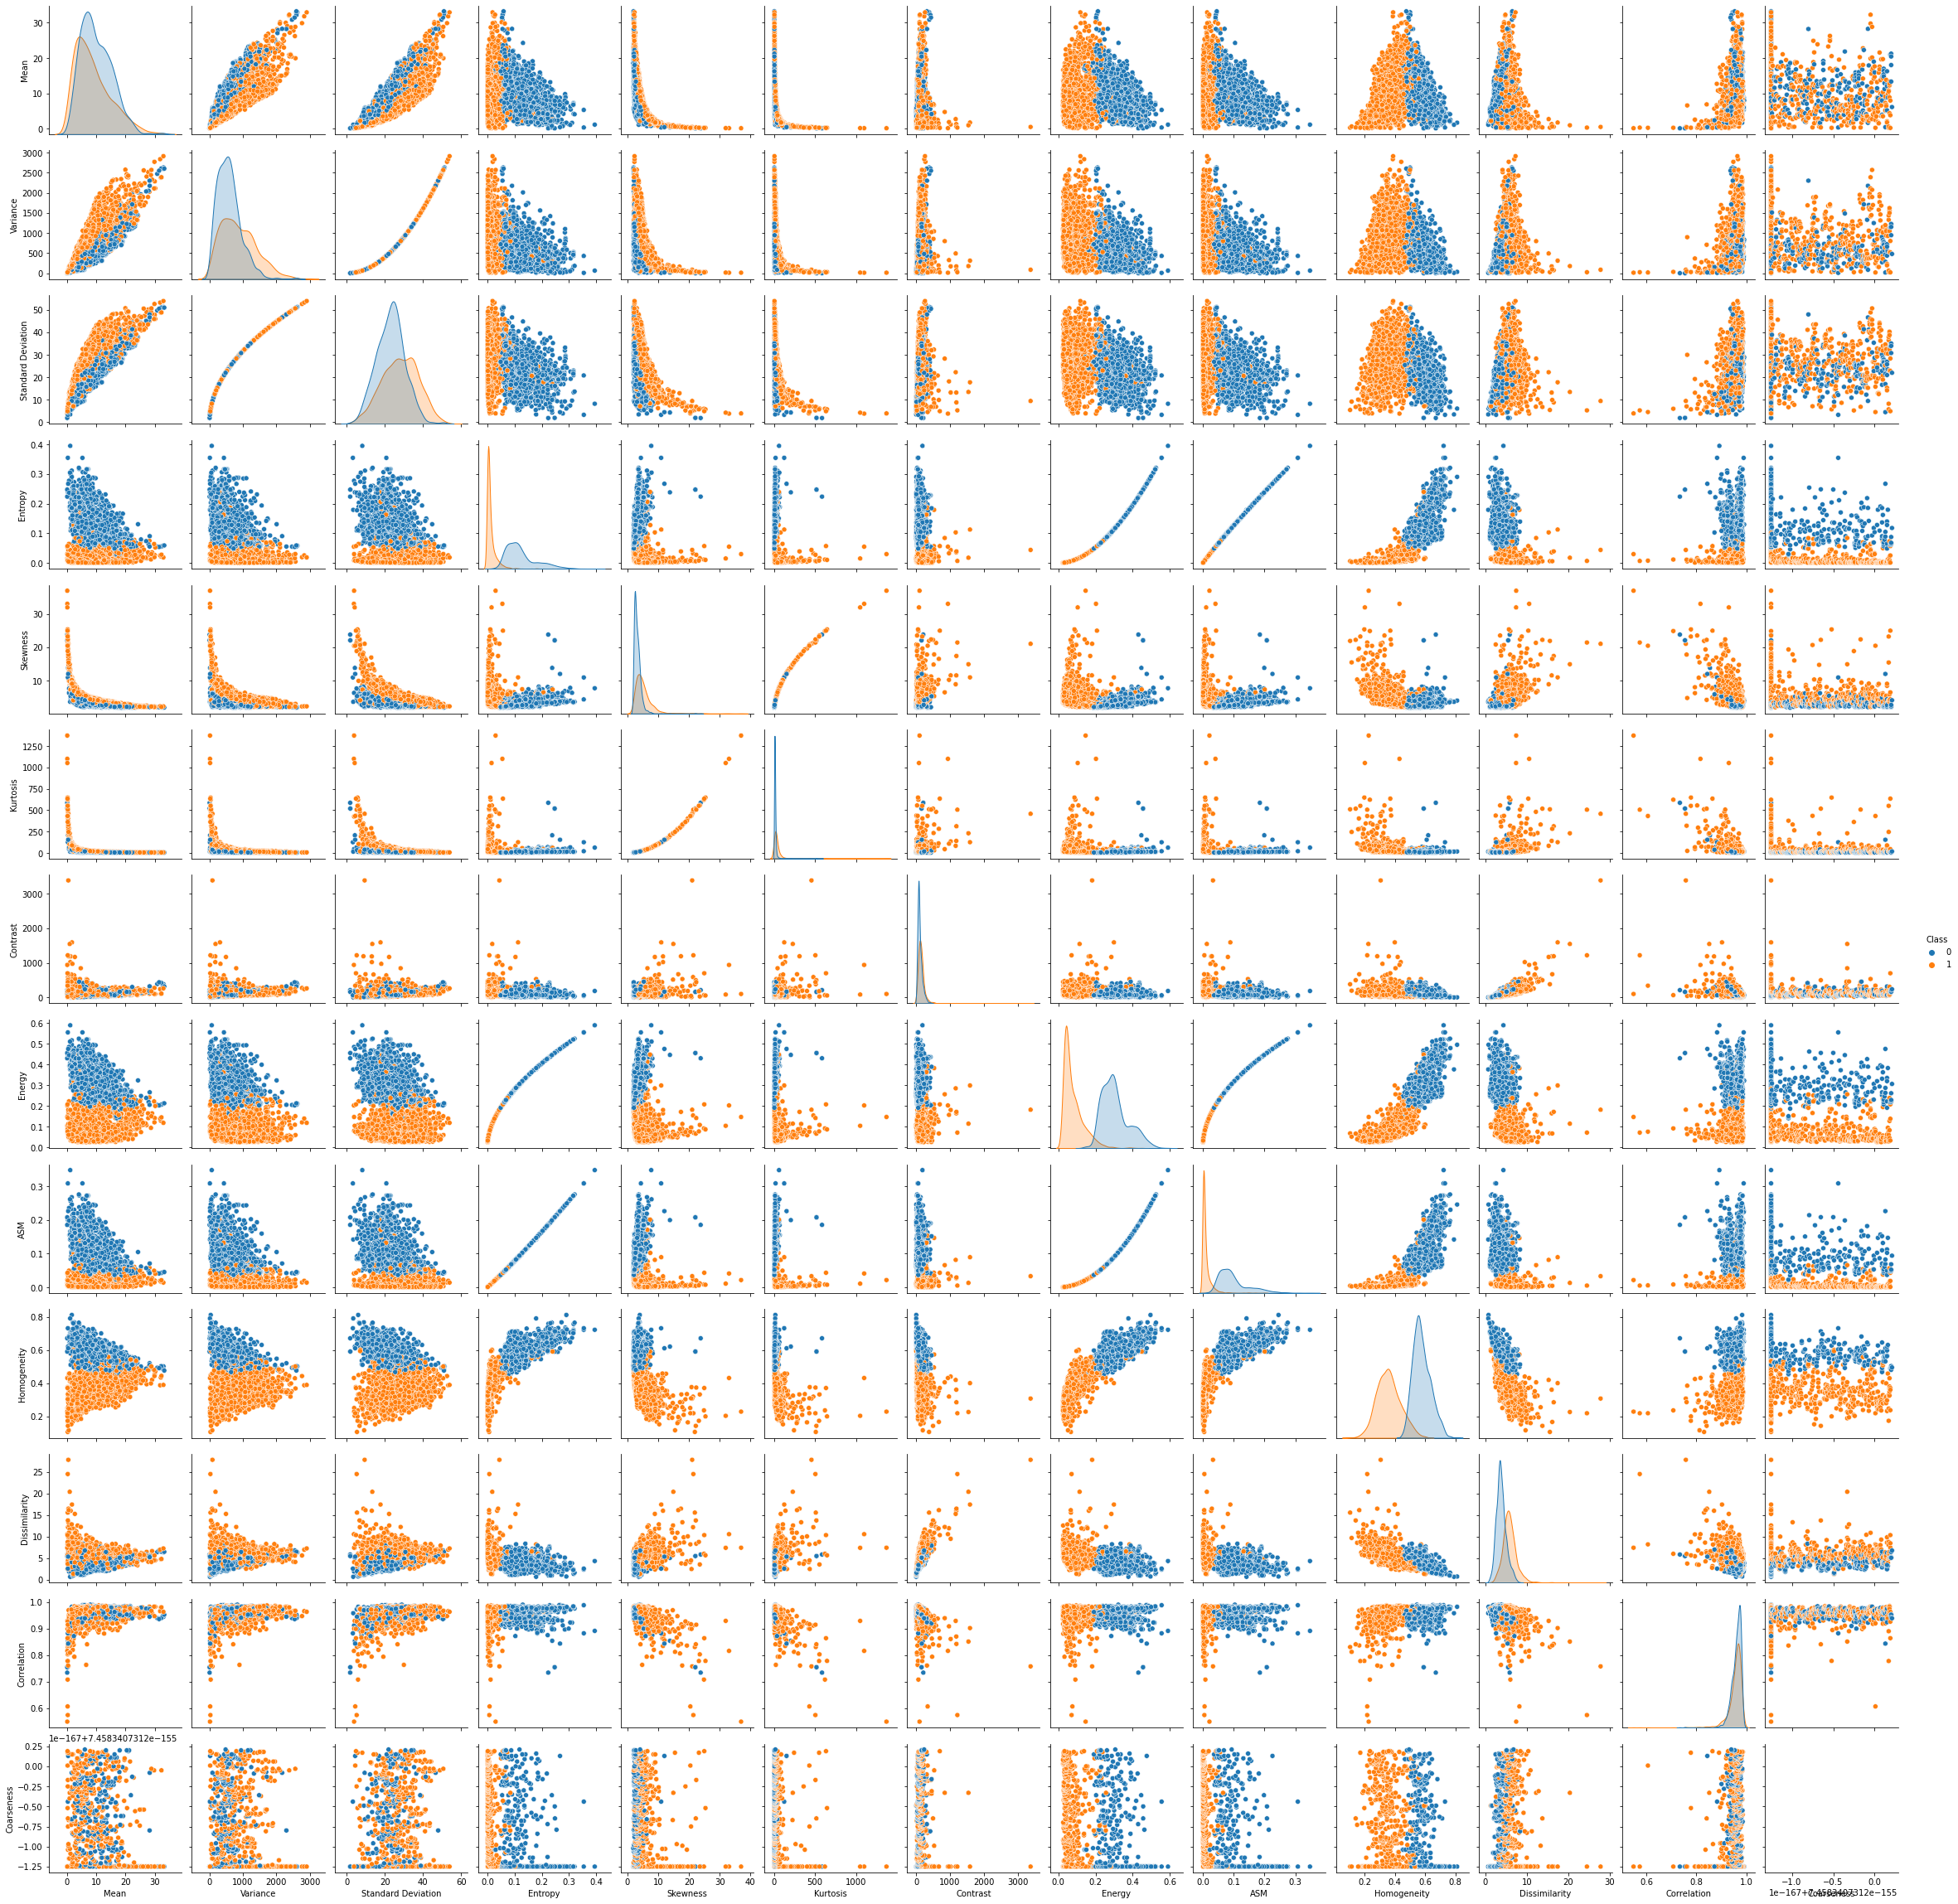

In [29]:
plt.figure(figsize=(10,10))
data=pd.read_csv("C://Users//prasa//Downloads//Brain Tumor.csv")
sns.pairplot(data,hue='Class')
plt.show()


Text(0, 0.5, 'cost')

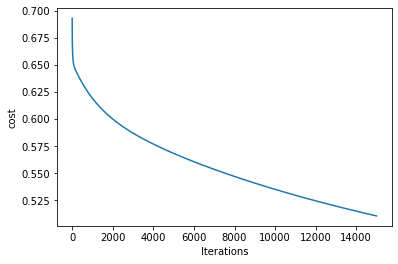

In [31]:
plt.plot(np.arange(iterations),cost)
plt.xlabel('Iterations')
plt.ylabel('cost')

cost after 0 iterations is  0.6931471805599453
cost after 500 iterations is  0.6364999490270699
cost after 0 iterations is  0.6931471805599453
cost after 500 iterations is  0.6364999490270699
cost after 1000 iterations is  0.6242763079232132
cost after 1500 iterations is  0.6145470999226268
cost after 0 iterations is  0.6931471805599453
cost after 500 iterations is  0.6364999490270699
cost after 1000 iterations is  0.6242763079232132
cost after 1500 iterations is  0.6145470999226268
cost after 2000 iterations is  0.6066219585934681
cost after 2500 iterations is  0.5999983483425537
cost after 0 iterations is  0.6931471805599453
cost after 500 iterations is  0.6364999490270699
cost after 1000 iterations is  0.6242763079232132
cost after 1500 iterations is  0.6145470999226268
cost after 2000 iterations is  0.6066219585934681
cost after 2500 iterations is  0.5999983483425537
cost after 3000 iterations is  0.5943165485304148
cost after 3500 iterations is  0.5893218181928409
cost after 0 ite

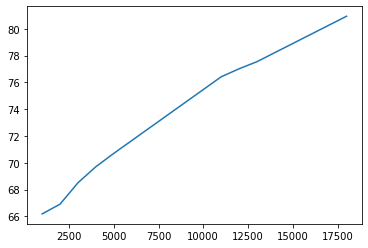

In [44]:
# Hyper parameter tuning
iter=[1000,2000,3000,4000,5000,11000,12000,13000,18000]
learning_rate=0.0002
acc=[]
def hyper_parameter_tuning(iter,learning_rate,X_train,Y_train,X_test,Y_Test):
    for i in range(len(iter)):
            w,b,cost=model(X_Train,Y_Train,iter[i],learning_rate)
            accur=prediction(w,b,X_Test,Y_Test)
            acc.append(accur)
hyper_parameter_tuning(iter,learning_rate,X_Train,Y_Train,X_test,Y_Test)
plt.plot(iter,acc)

    
    
    

In [45]:
max(acc)

80.93023255813954

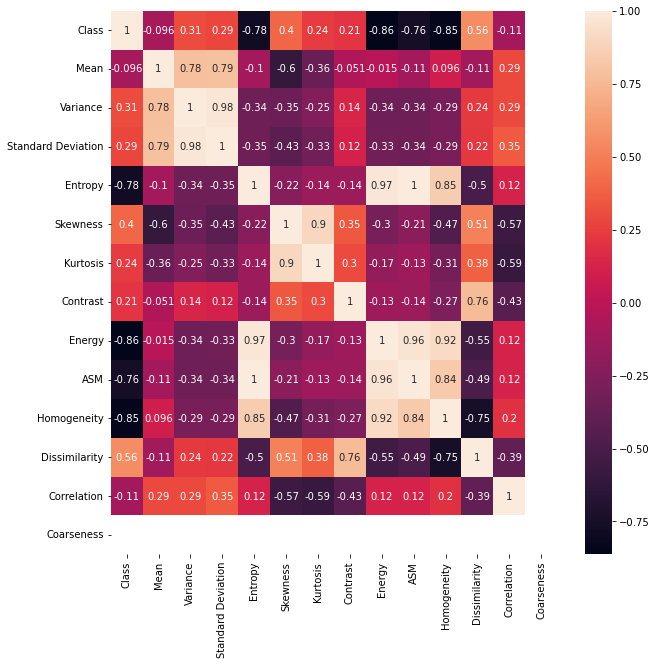

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()